<a href="https://colab.research.google.com/github/jrebull/UX/blob/main/Analisis_encuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import numpy as np

from itertools import combinations


In [ ]:
file_id = '1tpRm7IFXT260bynwD_guzYQ_1baG5DJ5'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'encuesta.csv', quiet=False)
df = pd.read_excel('encuesta.csv')
print(f'\nLa encuesta tiene {df.shape[0]} registros')

Downloading...
From: https://drive.google.com/uc?id=1tpRm7IFXT260bynwD_guzYQ_1baG5DJ5
To: /content/encuesta.csv
100%|██████████| 19.4k/19.4k [00:00<00:00, 35.8MB/s]



La encuesta tiene 60 registros


In [ ]:
df.head()

,Fecha,p1_edad,p1_otros,p2_genero,p2_otros,p3_pais,p3_otros,p4_profesion,p4_otros,p5_visa,...,p21_dispositivo,p21_otros,p22_caracteristica_esencial,p22_otros,p23_agrupacion_admin_reportes,p23_otros,p24_tarea_desafio,p24_otros,p25_elemento_orientacion,p25_otros
0,2025-07-31 03:54:32.313,25-34 años,NaN,Masculino,NaN,México,NaN,Ingeniería o tecnología,NaN,"No, pero planeo hacerlo pronto",...,Teléfono móvil (smartphone),NaN,Un dashboard inicial con resumen personalizado...,NaN,En una sección de Resultados y Análisis,NaN,Encontrar rápidamente recomendaciones personal...,NaN,Breadcrumbs (ruta de navegación visible),NaN
1,2025-07-31 03:55:47.794,25-34 años,NaN,Masculino,NaN,Canadá,NaN,Finanzas o economía,NaN,"Sí, pero fue rechazada",...,Teléfono móvil (smartphone),NaN,Un dashboard inicial con resumen personalizado...,NaN,En una categoría de Gestión y Administración,NaN,Encontrar rápidamente recomendaciones personal...,NaN,Otros,Que se vea claro
2,2025-07-31 04:09:15.610,25-34 años,NaN,Masculino,NaN,Estados Unidos,NaN,Ingeniería o tecnología,NaN,"Sí, y fue aprobada",...,Computadora de escritorio o laptop,NaN,Herramientas interactivas como checklists y si...,NaN,En una sección de Resultados y Análisis,NaN,Completar un flujo guiado sin confusiones,NaN,Breadcrumbs (ruta de navegación visible),NaN
3,2025-07-31 04:09:24.649,45-54 años,NaN,Masculino,NaN,México,NaN,Ingeniería o tecnología,NaN,"No, pero planeo hacerlo pronto",...,Computadora de escritorio o laptop,NaN,Secciones dedicadas a predicciones y riesgos e...,NaN,Como elementos independientes en la navegación...,NaN,Actualizar mi historial migratorio sin perder ...,NaN,Iconos intuitivos con tooltips explicativos,NaN
4,2025-07-31 04:13:37.531,25-34 años,NaN,Masculino,NaN,México,NaN,Finanzas o economía,NaN,"No, pero planeo hacerlo pronto",...,Teléfono móvil (smartphone),NaN,Contenido educativo sobre cambios legales reci...,NaN,Como parte del Perfil del Usuario,NaN,Actualizar mi historial migratorio sin perder ...,NaN,Iconos intuitivos con tooltips explicativos,NaN


In [ ]:
encuesta = df.dropna(axis=1,how='all').copy()
encuesta = encuesta.drop('Fecha',axis = 1)
encuesta = encuesta.loc[:, ~encuesta.columns.str.contains("otros")]

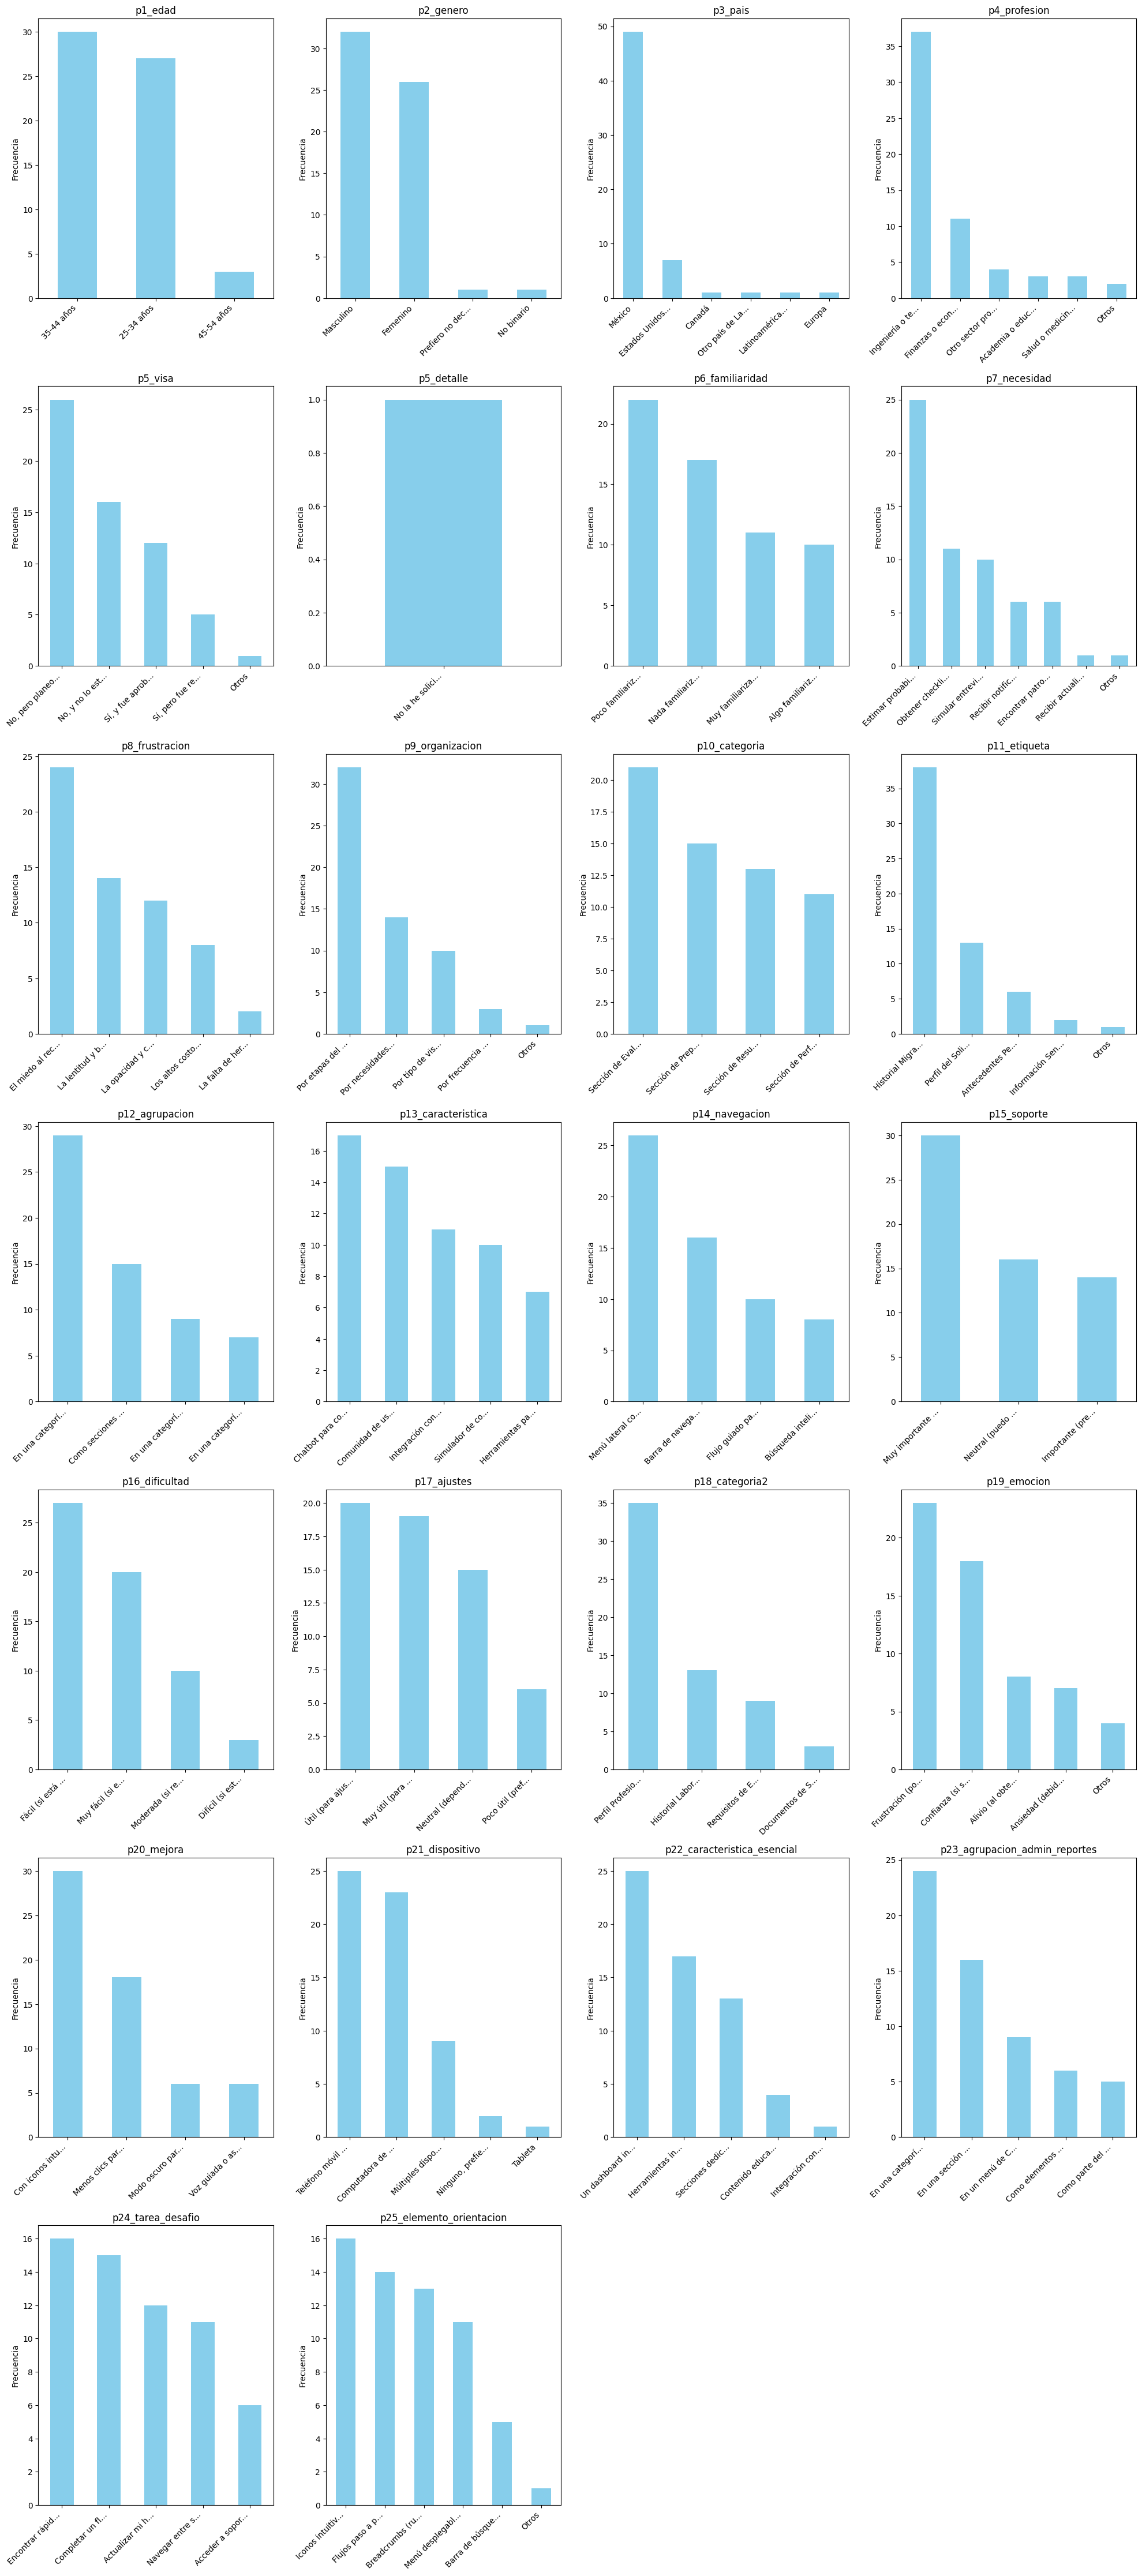

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(20, 50))
axes = axes.flatten()

for i, col in enumerate(encuesta.columns):
    ax = axes[i]
    counts = df[col].value_counts()
    bars = counts.plot(kind='bar', ax=ax, title=col, color='skyblue')
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')


    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels([label[:15] + '...' if len(label) > 10 else label for label in counts.index], rotation=45, ha='right')


for j in range(i + 1, 32):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()


In [ ]:
label_encoders = {}
mapeos = {}

for col in encuesta.columns:
    le = LabelEncoder()
    encuesta[col] = le.fit_transform(encuesta[col])
    label_encoders[col] = le
    mapeos[col] = dict(zip(le.classes_, le.transform(le.classes_)))

def obtener_clave_por_valor(diccionario, valor_buscado):
    for clave, valor in diccionario.items():
        if valor == valor_buscado:
            return clave
    return None


In [ ]:
def cramers_v(contingency_table):
  chi2 = chi2_contingency(contingency_table)[0]
  n = contingency_table.sum().sum()
  r, k = contingency_table.shape
  v = np.sqrt(chi2 / (n * min(r-1, k-1)))
  return v

In [ ]:
def obten_correlacion(columna_1,columna_2,dataframe):

  tabla = pd.crosstab(dataframe[columna_1], dataframe[columna_2])

  tabla.index.name = columna_1
  tabla.columns.name = columna_2

  chi2, p_value, dof, expected_frequencies = chi2_contingency(tabla)

  print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
  print(f"Valor p: {p_value:.4f}")
  print(f"Grados de libertad (df): {dof}")

  print("\nFrecuencias esperadas (si fueran independientes):")
  print(pd.DataFrame(expected_frequencies, index=tabla.index, columns=tabla.columns))

  # --- Interpretación del Valor p ---
  alpha = 0.05 # Nivel de significancia común

  print(f"\nInterpretación (con alpha = {alpha}):")
  if p_value < alpha:
    print("El valor p es menor que alpha. Se rechaza la hipótesis nula.")
    print(f'Conclusión: Existe una asociación estadísticamente significativa entre {columna_1} y {columna_2}.')

    v_cramer_val = cramers_v(tabla)
    print(f"\nV de Cramer: {v_cramer_val:.3f}")

    if v_cramer_val < 0.1:
        print("Fuerza de Asociación: Muy débil (o insignificante)")
    elif v_cramer_val < 0.3:
        print("Fuerza de Asociación: Débil")
    elif v_cramer_val < 0.5:
        print("Fuerza de Asociación: Moderada")
    else:
        print("Fuerza de Asociación: Fuerte")

  else:
    print("El valor p es mayor o igual que alpha. No se rechaza la hipótesis nula.")
    print(f'Conclusión: No hay evidencia de una asociación estadísticamente significativa entre {columna_1} y {columna_2}.')

  max_expected_value = np.max(expected_frequencies)
  flat_index = np.argmax(expected_frequencies)
  row_index, col_index = np.unravel_index(flat_index, expected_frequencies.shape)

  max_row_name = tabla.index[row_index]
  max_col_name = tabla.columns[col_index]

  fila = obtener_clave_por_valor(mapeos[columna_1],max_row_name)
  columna = obtener_clave_por_valor(mapeos[columna_2],max_col_name)

  print("\n" + "="*60 + "\n")
  print(f"El valor más alto de las frecuencias esperadas es: {max_expected_value:.4f}")
  print(f"El nombre de la fila asociada ({columna_1}) es: \033[32m{fila}\033[0m")
  print(f"El nombre de la columna asociada ({columna_2}) es: \033[32m{columna}\033[0m")

In [ ]:
columnas = encuesta.columns
combinaciones = list(combinations(columnas, 2))

asociaciones_fuertes = []

for columna_1, columna_2 in combinaciones:

  tabla = pd.crosstab(encuesta[columna_1], encuesta[columna_2])
  v_cramer_val = cramers_v(tabla)

  if v_cramer_val >= 0.35:
    asociaciones_fuertes.append(((columna_1, columna_2),v_cramer_val))

asociaciones_fuertes = sorted(asociaciones_fuertes, key=lambda x: x[1], reverse=True)

df_asociaciones = pd.DataFrame(asociaciones_fuertes, columns=['Combinación', 'V de Cramer'])



In [ ]:
df_asociaciones

,Combinación,V de Cramer
0,"(p5_visa, p5_detalle)",1.000000
1,"(p2_genero, p3_pais)",0.594569
2,"(p7_necesidad, p15_soporte)",0.536815
3,"(p3_pais, p25_elemento_orientacion)",0.535824
4,"(p12_agrupacion, p15_soporte)",0.490304
5,"(p1_edad, p7_necesidad)",0.473020
6,"(p4_profesion, p11_etiqueta)",0.459434
7,"(p3_pais, p4_profesion)",0.454160
8,"(p2_genero, p4_profesion)",0.439042
9,"(p7_necesidad, p16_dificultad)",0.435535


In [ ]:
obten_correlacion('p7_necesidad','p15_soporte',encuesta)

Estadístico Chi-cuadrado: 34.5805
Valor p: 0.0005
Grados de libertad (df): 12

Frecuencias esperadas (si fueran independientes):
p15_soporte          0     1         2
p7_necesidad                          
0             1.400000   3.0  1.600000
1             5.833333  12.5  6.666667
2             2.566667   5.5  2.933333
3             0.233333   0.5  0.266667
4             0.233333   0.5  0.266667
5             1.400000   3.0  1.600000
6             2.333333   5.0  2.666667

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p7_necesidad y p15_soporte.

V de Cramer: 0.537
Fuerza de Asociación: Fuerte


El valor más alto de las frecuencias esperadas es: 12.5000
El nombre de la fila asociada (p7_necesidad) es: Estimar probabilidades de aprobación de visa
El nombre de la columna asociada (p15_soporte) es: Muy importante (es mi idioma principal)


In [ ]:
obten_correlacion('p12_agrupacion','p15_soporte',encuesta)

Estadístico Chi-cuadrado: 28.8478
Valor p: 0.0001
Grados de libertad (df): 6

Frecuencias esperadas (si fueran independientes):
p15_soporte            0     1         2
p12_agrupacion                          
0               3.500000   7.5  4.000000
1               6.766667  14.5  7.733333
2               2.100000   4.5  2.400000
3               1.633333   3.5  1.866667

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p12_agrupacion y p15_soporte.

V de Cramer: 0.490
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 14.5000
El nombre de la fila asociada (p12_agrupacion) es: En una categoría de Actualizaciones y Noticias
El nombre de la columna asociada (p15_soporte) es: Muy importante (es mi idioma principal)


In [ ]:
obten_correlacion('p7_necesidad','p16_dificultad',encuesta)

Estadístico Chi-cuadrado: 34.1443
Valor p: 0.0121
Grados de libertad (df): 18

Frecuencias esperadas (si fueran independientes):
p16_dificultad     0      1         2         3
p7_necesidad                                   
0               0.30   2.70  1.000000  2.000000
1               1.25  11.25  4.166667  8.333333
2               0.55   4.95  1.833333  3.666667
3               0.05   0.45  0.166667  0.333333
4               0.05   0.45  0.166667  0.333333
5               0.30   2.70  1.000000  2.000000
6               0.50   4.50  1.666667  3.333333

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p7_necesidad y p16_dificultad.

V de Cramer: 0.436
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 11.2500
El nombre de la fila asociada (p7_necesidad) es: Estimar probabilidades de aprobación de visa
El nombre de la columna asociada (

In [ ]:
obten_correlacion('p8_frustracion','p11_etiqueta',encuesta)

Estadístico Chi-cuadrado: 40.7420
Valor p: 0.0006
Grados de libertad (df): 16

Frecuencias esperadas (si fueran independientes):
p11_etiqueta      0          1         2         3         4
p8_frustracion                                              
0               2.4  15.200000  0.800000  0.400000  5.200000
1               0.2   1.266667  0.066667  0.033333  0.433333
2               1.4   8.866667  0.466667  0.233333  3.033333
3               1.2   7.600000  0.400000  0.200000  2.600000
4               0.8   5.066667  0.266667  0.133333  1.733333

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p8_frustracion y p11_etiqueta.

V de Cramer: 0.412
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 15.2000
El nombre de la fila asociada (p8_frustracion) es: El miedo al rechazo sin razones claras
El nombre de la columna asociada (p11_etiqu

In [ ]:
obten_correlacion('p17_ajustes','p25_elemento_orientacion',encuesta)

Estadístico Chi-cuadrado: 27.9432
Valor p: 0.0219
Grados de libertad (df): 15

Frecuencias esperadas (si fueran independientes):
p25_elemento_orientacion         0         1         2         3         4  \
p17_ajustes                                                                  
0                         1.583333  4.116667  4.433333  5.066667  3.483333   
1                         1.250000  3.250000  3.500000  4.000000  2.750000   
2                         0.500000  1.300000  1.400000  1.600000  1.100000   
3                         1.666667  4.333333  4.666667  5.333333  3.666667   

p25_elemento_orientacion         5  
p17_ajustes                         
0                         0.316667  
1                         0.250000  
2                         0.100000  
3                         0.333333  

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p17_ajustes 

In [ ]:
obten_correlacion('p23_agrupacion_admin_reportes','p25_elemento_orientacion',encuesta)

Estadístico Chi-cuadrado: 36.2133
Valor p: 0.0145
Grados de libertad (df): 20

Frecuencias esperadas (si fueran independientes):
p25_elemento_orientacion              0         1         2         3  \
p23_agrupacion_admin_reportes                                           
0                              0.500000  1.300000  1.400000  1.600000   
1                              0.416667  1.083333  1.166667  1.333333   
2                              0.750000  1.950000  2.100000  2.400000   
3                              2.000000  5.200000  5.600000  6.400000   
4                              1.333333  3.466667  3.733333  4.266667   

p25_elemento_orientacion              4         5  
p23_agrupacion_admin_reportes                      
0                              1.100000  0.100000  
1                              0.916667  0.083333  
2                              1.650000  0.150000  
3                              4.400000  0.400000  
4                              2.933333  0.2666

In [ ]:
obten_correlacion('p10_categoria','p23_agrupacion_admin_reportes',encuesta)

Estadístico Chi-cuadrado: 26.7720
Valor p: 0.0083
Grados de libertad (df): 12

Frecuencias esperadas (si fueran independientes):
p23_agrupacion_admin_reportes    0         1     2    3         4
p10_categoria                                                    
0                              2.1  1.750000  3.15  8.4  5.600000
1                              1.1  0.916667  1.65  4.4  2.933333
2                              1.5  1.250000  2.25  6.0  4.000000
3                              1.3  1.083333  1.95  5.2  3.466667

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p10_categoria y p23_agrupacion_admin_reportes.

V de Cramer: 0.386
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 8.4000
El nombre de la fila asociada (p10_categoria) es: Sección de Evaluación Inicial
El nombre de la columna asociada (p23_agrupacion_admin_reportes) es: 

In [ ]:
obten_correlacion('p14_navegacion','p20_mejora',encuesta)

Estadístico Chi-cuadrado: 26.4821
Valor p: 0.0017
Grados de libertad (df): 9

Frecuencias esperadas (si fueran independientes):
p20_mejora         0    1    2    3
p14_navegacion                     
0                8.0  4.8  1.6  1.6
1                4.0  2.4  0.8  0.8
2                5.0  3.0  1.0  1.0
3               13.0  7.8  2.6  2.6

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p14_navegacion y p20_mejora.

V de Cramer: 0.384
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 13.0000
El nombre de la fila asociada (p14_navegacion) es: Menú lateral con categorías fijas
El nombre de la columna asociada (p20_mejora) es: Con iconos intuitivos y texto claro


In [ ]:
obten_correlacion('p5_visa','p6_familiaridad',encuesta)

Estadístico Chi-cuadrado: 25.8308
Valor p: 0.0113
Grados de libertad (df): 12

Frecuencias esperadas (si fueran independientes):
p6_familiaridad         0         1         2         3
p5_visa                                                
0                4.333333  4.766667  7.366667  9.533333
1                2.666667  2.933333  4.533333  5.866667
2                0.166667  0.183333  0.283333  0.366667
3                0.833333  0.916667  1.416667  1.833333
4                2.000000  2.200000  3.400000  4.400000

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p5_visa y p6_familiaridad.

V de Cramer: 0.379
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 9.5333
El nombre de la fila asociada (p5_visa) es: No, pero planeo hacerlo pronto
El nombre de la columna asociada (p6_familiaridad) es: Poco familiarizado (solo sé lo básico)


In [ ]:
obten_correlacion('p4_profesion','p13_caracteristica',encuesta)

Estadístico Chi-cuadrado: 34.2517
Valor p: 0.0245
Grados de libertad (df): 20

Frecuencias esperadas (si fueran independientes):
p13_caracteristica          0     1         2         3         4
p4_profesion                                                     
0                    0.850000  0.75  0.350000  0.550000  0.500000
1                    3.116667  2.75  1.283333  2.016667  1.833333
2                   10.483333  9.25  4.316667  6.783333  6.166667
3                    1.133333  1.00  0.466667  0.733333  0.666667
4                    0.566667  0.50  0.233333  0.366667  0.333333
5                    0.850000  0.75  0.350000  0.550000  0.500000

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p4_profesion y p13_caracteristica.

V de Cramer: 0.378
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 10.4833
El nombre de la fila asociad

In [ ]:
obten_correlacion('p8_frustracion','p14_navegacion',encuesta)

Estadístico Chi-cuadrado: 25.2764
Valor p: 0.0136
Grados de libertad (df): 12

Frecuencias esperadas (si fueran independientes):
p14_navegacion         0         1         2          3
p8_frustracion                                         
0               6.400000  3.200000  4.000000  10.400000
1               0.533333  0.266667  0.333333   0.866667
2               3.733333  1.866667  2.333333   6.066667
3               3.200000  1.600000  2.000000   5.200000
4               2.133333  1.066667  1.333333   3.466667

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p8_frustracion y p14_navegacion.

V de Cramer: 0.375
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 10.4000
El nombre de la fila asociada (p8_frustracion) es: El miedo al rechazo sin razones claras
El nombre de la columna asociada (p14_navegacion) es: Menú lateral con categ

In [ ]:
obten_correlacion('p6_familiaridad','p22_caracteristica_esencial',encuesta)

Estadístico Chi-cuadrado: 25.1300
Valor p: 0.0142
Grados de libertad (df): 12

Frecuencias esperadas (si fueran independientes):
p22_caracteristica_esencial         0         1         2         3         4
p6_familiaridad                                                              
0                            0.666667  2.833333  0.166667  2.166667  4.166667
1                            0.733333  3.116667  0.183333  2.383333  4.583333
2                            1.133333  4.816667  0.283333  3.683333  7.083333
3                            1.466667  6.233333  0.366667  4.766667  9.166667

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p6_familiaridad y p22_caracteristica_esencial.

V de Cramer: 0.374
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 9.1667
El nombre de la fila asociada (p6_familiaridad) es: Poco familiarizado (solo 

In [ ]:
obten_correlacion('p7_necesidad','p12_agrupacion',encuesta)

Estadístico Chi-cuadrado: 24.9085
Valor p: 0.1275
Grados de libertad (df): 18

Frecuencias esperadas (si fueran independientes):
p12_agrupacion     0          1     2         3
p7_necesidad                                   
0               1.50   2.900000  0.90  0.700000
1               6.25  12.083333  3.75  2.916667
2               2.75   5.316667  1.65  1.283333
3               0.25   0.483333  0.15  0.116667
4               0.25   0.483333  0.15  0.116667
5               1.50   2.900000  0.90  0.700000
6               2.50   4.833333  1.50  1.166667

Interpretación (con alpha = 0.05):
El valor p es mayor o igual que alpha. No se rechaza la hipótesis nula.
Conclusión: No hay evidencia de una asociación estadísticamente significativa entre p7_necesidad y p12_agrupacion.


El valor más alto de las frecuencias esperadas es: 12.0833
El nombre de la fila asociada (p7_necesidad) es: Estimar probabilidades de aprobación de visa
El nombre de la columna asociada (p12_agrupacion) es: En una 

In [ ]:
obten_correlacion('p13_caracteristica','p14_navegacion',encuesta)

Estadístico Chi-cuadrado: 24.7185
Valor p: 0.0162
Grados de libertad (df): 12

Frecuencias esperadas (si fueran independientes):
p14_navegacion             0         1         2         3
p13_caracteristica                                        
0                   4.533333  2.266667  2.833333  7.366667
1                   4.000000  2.000000  2.500000  6.500000
2                   1.866667  0.933333  1.166667  3.033333
3                   2.933333  1.466667  1.833333  4.766667
4                   2.666667  1.333333  1.666667  4.333333

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p13_caracteristica y p14_navegacion.

V de Cramer: 0.371
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 7.3667
El nombre de la fila asociada (p13_caracteristica) es: Chatbot para consultas en tiempo real
El nombre de la columna asociada (p14_navegacion)

In [ ]:
obten_correlacion('p1_edad','p22_caracteristica_esencial',encuesta)

Estadístico Chi-cuadrado: 16.4394
Valor p: 0.0365
Grados de libertad (df): 8

Frecuencias esperadas (si fueran independientes):
p22_caracteristica_esencial    0     1     2     3      4
p1_edad                                                  
0                            1.8  7.65  0.45  5.85  11.25
1                            2.0  8.50  0.50  6.50  12.50
2                            0.2  0.85  0.05  0.65   1.25

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p1_edad y p22_caracteristica_esencial.

V de Cramer: 0.370
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 12.5000
El nombre de la fila asociada (p1_edad) es: 35-44 años
El nombre de la columna asociada (p22_caracteristica_esencial) es: Un dashboard inicial con resumen personalizado de mi perfil


In [ ]:
obten_correlacion('p4_profesion','p19_emocion',encuesta)

Estadístico Chi-cuadrado: 31.7754
Valor p: 0.0458
Grados de libertad (df): 20

Frecuencias esperadas (si fueran independientes):
p19_emocion          0         1     2          3         4
p4_profesion                                               
0             0.400000  0.350000   0.9   1.150000  0.200000
1             1.466667  1.283333   3.3   4.216667  0.733333
2             4.933333  4.316667  11.1  14.183333  2.466667
3             0.533333  0.466667   1.2   1.533333  0.266667
4             0.266667  0.233333   0.6   0.766667  0.133333
5             0.400000  0.350000   0.9   1.150000  0.200000

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p4_profesion y p19_emocion.

V de Cramer: 0.364
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 14.1833
El nombre de la fila asociada (p4_profesion) es: Ingeniería o tecnología
El nombre 

In [ ]:
obten_correlacion('p7_necesidad','p20_mejora',encuesta)

Estadístico Chi-cuadrado: 23.6566
Valor p: 0.1666
Grados de libertad (df): 18

Frecuencias esperadas (si fueran independientes):
p20_mejora       0    1    2    3
p7_necesidad                     
0              3.0  1.8  0.6  0.6
1             12.5  7.5  2.5  2.5
2              5.5  3.3  1.1  1.1
3              0.5  0.3  0.1  0.1
4              0.5  0.3  0.1  0.1
5              3.0  1.8  0.6  0.6
6              5.0  3.0  1.0  1.0

Interpretación (con alpha = 0.05):
El valor p es mayor o igual que alpha. No se rechaza la hipótesis nula.
Conclusión: No hay evidencia de una asociación estadísticamente significativa entre p7_necesidad y p20_mejora.


El valor más alto de las frecuencias esperadas es: 12.5000
El nombre de la fila asociada (p7_necesidad) es: Estimar probabilidades de aprobación de visa
El nombre de la columna asociada (p20_mejora) es: Con iconos intuitivos y texto claro


In [ ]:
obten_correlacion('p1_edad','p17_ajustes',encuesta)

Estadístico Chi-cuadrado: 15.6920
Valor p: 0.0155
Grados de libertad (df): 6

Frecuencias esperadas (si fueran independientes):
p17_ajustes     0     1    2     3
p1_edad                           
0            8.55  6.75  2.7   9.0
1            9.50  7.50  3.0  10.0
2            0.95  0.75  0.3   1.0

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p1_edad y p17_ajustes.

V de Cramer: 0.362
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 10.0000
El nombre de la fila asociada (p1_edad) es: 35-44 años
El nombre de la columna asociada (p17_ajustes) es: Útil (para ajustes básicos)


In [ ]:
obten_correlacion('p5_visa','p7_necesidad',encuesta)

Estadístico Chi-cuadrado: 30.8333
Valor p: 0.1586
Grados de libertad (df): 24

Frecuencias esperadas (si fueran independientes):
p7_necesidad    0          1         2         3         4    5         6
p5_visa                                                                  
0             2.6  10.833333  4.766667  0.433333  0.433333  2.6  4.333333
1             1.6   6.666667  2.933333  0.266667  0.266667  1.6  2.666667
2             0.1   0.416667  0.183333  0.016667  0.016667  0.1  0.166667
3             0.5   2.083333  0.916667  0.083333  0.083333  0.5  0.833333
4             1.2   5.000000  2.200000  0.200000  0.200000  1.2  2.000000

Interpretación (con alpha = 0.05):
El valor p es mayor o igual que alpha. No se rechaza la hipótesis nula.
Conclusión: No hay evidencia de una asociación estadísticamente significativa entre p5_visa y p7_necesidad.


El valor más alto de las frecuencias esperadas es: 10.8333
El nombre de la fila asociada (p5_visa) es: No, pero planeo hacerlo pronto
E

In [ ]:
obten_correlacion('p4_profesion','p21_dispositivo',encuesta)

Estadístico Chi-cuadrado: 30.6688
Valor p: 0.0597
Grados de libertad (df): 20

Frecuencias esperadas (si fueran independientes):
p21_dispositivo          0     1         2         3          4
p4_profesion                                                   
0                 1.150000  0.45  0.100000  0.050000   1.250000
1                 4.216667  1.65  0.366667  0.183333   4.583333
2                14.183333  5.55  1.233333  0.616667  15.416667
3                 1.533333  0.60  0.133333  0.066667   1.666667
4                 0.766667  0.30  0.066667  0.033333   0.833333
5                 1.150000  0.45  0.100000  0.050000   1.250000

Interpretación (con alpha = 0.05):
El valor p es mayor o igual que alpha. No se rechaza la hipótesis nula.
Conclusión: No hay evidencia de una asociación estadísticamente significativa entre p4_profesion y p21_dispositivo.


El valor más alto de las frecuencias esperadas es: 15.4167
El nombre de la fila asociada (p4_profesion) es: Ingeniería o tecnología
E

In [ ]:
obten_correlacion('p5_visa','p20_mejora',encuesta)

Estadístico Chi-cuadrado: 22.4291
Valor p: 0.0330
Grados de libertad (df): 12

Frecuencias esperadas (si fueran independientes):
p20_mejora     0    1    2    3
p5_visa                        
0           13.0  7.8  2.6  2.6
1            8.0  4.8  1.6  1.6
2            0.5  0.3  0.1  0.1
3            2.5  1.5  0.5  0.5
4            6.0  3.6  1.2  1.2

Interpretación (con alpha = 0.05):
El valor p es menor que alpha. Se rechaza la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre p5_visa y p20_mejora.

V de Cramer: 0.353
Fuerza de Asociación: Moderada


El valor más alto de las frecuencias esperadas es: 13.0000
El nombre de la fila asociada (p5_visa) es: No, pero planeo hacerlo pronto
El nombre de la columna asociada (p20_mejora) es: Con iconos intuitivos y texto claro


In [ ]:
obten_correlacion('p8_frustracion','p25_elemento_orientacion',encuesta)

Estadístico Chi-cuadrado: 29.8679
Valor p: 0.0720
Grados de libertad (df): 20

Frecuencias esperadas (si fueran independientes):
p25_elemento_orientacion         0         1         2         3         4  \
p8_frustracion                                                               
0                         2.000000  5.200000  5.600000  6.400000  4.400000   
1                         0.166667  0.433333  0.466667  0.533333  0.366667   
2                         1.166667  3.033333  3.266667  3.733333  2.566667   
3                         1.000000  2.600000  2.800000  3.200000  2.200000   
4                         0.666667  1.733333  1.866667  2.133333  1.466667   

p25_elemento_orientacion         5  
p8_frustracion                      
0                         0.400000  
1                         0.033333  
2                         0.233333  
3                         0.200000  
4                         0.133333  

Interpretación (con alpha = 0.05):
El valor p es mayor o igual q